In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# importing the dataset
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [3]:
X.shape

(10, 1)

In [5]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
y.shape

(10,)

In [6]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Let’s split our dataset to get training set and testing set (both X and y values per each set)

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

We already have the train set and test set, now we have to build the Regression Model. Firstly, we will build a Linear Regression model and visualize it (it’s no need to include this step in your practice, we just do this for comparison between Linear and Polynomial only):

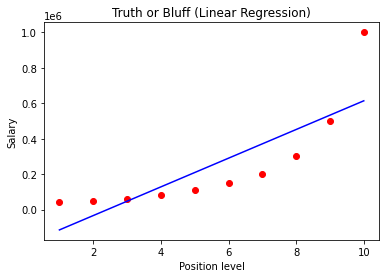

In [8]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

In another hand, we will build the Polynomial Regression model and visualize it to see the differences:

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

Last step, let’s predict the value of our candidate (with 5.5 YE) using both Linear Regression model and Polynomial Regression model:

In [ ]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])
#output should be 249500

# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))
#output should be 132148.43750003

You can see, the predicted values using Linear Regression model and Polynomial Regression model are totally different!

In [ ]:
lin_reg.predict([[5.5]])

In [ ]:
pol_reg.predict(poly_reg.fit_transform([[5.5]]))

Let’s scroll up and check again what we got? According to our data set, our salary should be:

$ 110,000 <  the  salary  < $ 150,000

But the predicted salary using Linear Regression lin_reg is $249,500. 

It’s unacceptable (but still in the range of -10,000 to 300,000 according to Linear Regression)! What’s about using Polynomial Regression? Our pol_reg value is 

$132,148.43750     

which is very close to our Mean value which is $130,000.

Bingo! It’s time to let our candidate know we will offer him a best salary in class with $132,148!